In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Data Preprocessing

In [ ]:
path = 'Modified_Goat_Dataset2.csv'
df = pd.read_csv(path)
df.head()

,ID Ternak,Umur,Berat Badan (kg),Status Kesehatan,Hari dari Vaksinasi Terakhir,Jenis Vaksin Terakhir,Riwayat Penyakit,Jenis Pakan,Jumlah Pakan Harian (kg)
0,KMB001,6,64,Sehat,474,Clostridium,Infeksi Kuku,Konsentrat,4.3
1,KMB002,2,41,Sakit,663,Antraks,Infeksi Kuku,Konsentrat,5.8
2,KMB003,0,56,Sakit,591,Clostridium,Infeksi Kuku,Jerami,4.6
3,KMB004,6,52,Sakit,680,Antraks,Flu,Rumput Gajah,4.6
4,KMB005,4,41,Sakit,675,Clostridium,Infeksi Kuku,Jerami,5.9


In [ ]:
# df = df.drop(['Nama Ternak',
#               'Harga Susu per Liter (Rp)',
#               'Biaya Pakan Harian (Rp)',
#               'Ras'
#               ], axis=1)

In [ ]:
# # # df['Kualitas Susu'] = df['Kualitas Susu'].apply(lambda x:3 if x == 'A' else 2 if x == 'B' else 1 if x == 'C' else 0)
# df['Status Reproduksi'] = df['Status Reproduksi'].apply(lambda x:1 if x == 'Hamil' else 0)
# df['Jenis Kelamin'] = df['Jenis Kelamin'].apply(lambda x:1 if x == 'Betina' else 0)
# # # df['Riwayat Penyakit'] = df['Riwayat Penyakit'].apply(lambda x:0 if x == 'Tidak Ada' else 1)
df['Riwayat Penyakit'] = df['Riwayat Penyakit'].apply(lambda x:0 if x == '-' else x)

df.head()

,ID Ternak,Umur,Berat Badan (kg),Status Kesehatan,Hari dari Vaksinasi Terakhir,Jenis Vaksin Terakhir,Riwayat Penyakit,Jenis Pakan,Jumlah Pakan Harian (kg)
0,KMB001,6,64,Sehat,474,Clostridium,Infeksi Kuku,Konsentrat,4.3
1,KMB002,2,41,Sakit,663,Antraks,Infeksi Kuku,Konsentrat,5.8
2,KMB003,0,56,Sakit,591,Clostridium,Infeksi Kuku,Jerami,4.6
3,KMB004,6,52,Sakit,680,Antraks,Flu,Rumput Gajah,4.6
4,KMB005,4,41,Sakit,675,Clostridium,Infeksi Kuku,Jerami,5.9


In [ ]:
df.shape

(335, 9)

In [ ]:
df.columns

Index(['ID Ternak', 'Umur', 'Berat Badan (kg)', 'Status Kesehatan',
       'Hari dari Vaksinasi Terakhir', 'Jenis Vaksin Terakhir',
       'Riwayat Penyakit', 'Jenis Pakan', 'Jumlah Pakan Harian (kg)'],
      dtype='object')

In [ ]:
x = pd.get_dummies(df.drop(['Status Kesehatan', 'ID Ternak', 'Jenis Vaksin Terakhir', 'Riwayat Penyakit', 'Jenis Pakan'], axis=1))
y = df['Status Kesehatan'].apply(lambda x:1 if x == 'Sehat' else 0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
x_train.head()

,Umur,Berat Badan (kg),Hari dari Vaksinasi Terakhir,Jumlah Pakan Harian (kg)
214,4,44,349,2.49
205,5,34,80,3.13
203,8,31,299,2.56
55,10,31,336,2.10
152,4,42,149,1.84


In [ ]:
y_train.head()

,Status Kesehatan
214,1
205,0
203,1
55,0
152,1


## 2. Build the Model

In [ ]:
# model = Sequential()
# #Input Layer
# model.add(Dense(units=64, activation='relu', input_dim=len(x_train.columns)))
# #Hidden Layer
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# #Output Layer
# model.add(Dense(units=1, activation='sigmoid', input_dim=len(x_train.columns)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()
# Input Layer
model.add(Dense(units=128, activation='relu', input_dim=len(x_train.columns)))

# Hidden Layers
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# from keras.layers import Dense, LSTM, Dropout, BatchNormalization
# model = Sequential()

# # Input LSTM layer
# # asumsikan x_train adalah data deret waktu dengan bentuk (jumlah_sampel, langkah_waktu, fitur)
# model.add(LSTM(units=128, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))

# # Hidden layers
# model.add(Dense(units=256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.1))

# model.add(Dense(units=64, activation='relu'))

# # Output layer
# model.add(Dense(units=1, activation='sigmoid'))

IndexError: tuple index out of range

## 3. Compile The Model

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

## 4. Model Fitting

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)
print("Train score:", model.evaluate(x_train, y_train))
print("Test score:", model.evaluate(x_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.5256 - loss: 0.7325 - val_accuracy: 0.3433 - val_loss: 1.0261
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6042 - loss: 0.6686 - val_accuracy: 0.3433 - val_loss: 1.3265
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5945 - loss: 0.6456 - val_accuracy: 0.3433 - val_loss: 1.2880
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5724 - loss: 0.6653 - val_accuracy: 0.3731 - val_loss: 0.8490
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6319 - loss: 0.6242 - val_accuracy: 0.4179 - val_loss: 0.8429
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5913 - loss: 0.6652 - val_accuracy: 0.3881 - val_loss: 0.9515
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5487 - loss: 0.6852 - val_accuracy: 0.3433 - val_loss: 0.8792
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6139 - loss: 0.6337 - val_accuracy: 0.4179 - val_loss: 0.810

## 5. Model Prediction

In [ ]:
y_hat = model.predict(x_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

skor = accuracy_score(y_test, y_hat)
print(f"Accuracy : {skor*100:.2f}%")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Accuracy : 61.19%


## 6. Evaluation Plot

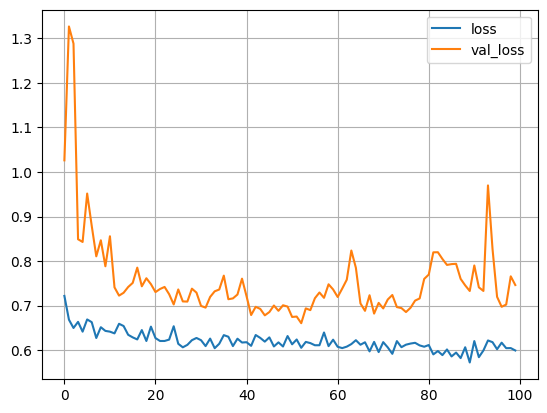

In [ ]:
#Plot the loss, epoch, and accuracy epochs
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.grid()
plt.legend()

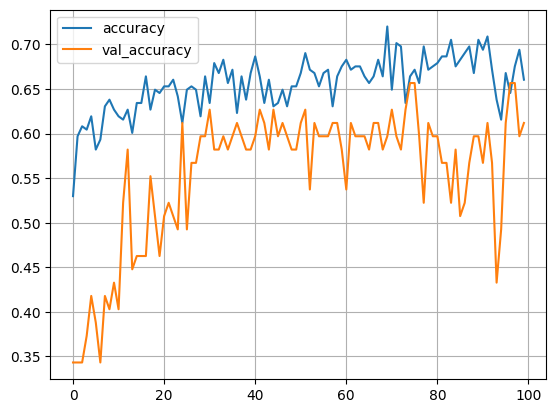

In [ ]:
#Accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.grid()
plt.legend()

## 7. Save the Model

In [ ]:
model.save('model_proto.h5')

In [ ]:
model = load_model('model_proto.h5')

In [ ]:
data_input = {
    'Umur' : 65,
    'Berat Badan (kg)': 2,
    'Hari dari Vaksinasi Terakhir': 890,
    'Jumlah Pakan Harian (kg)': 3,
}
input_df = pd.DataFrame(data_input, index=[0])

In [ ]:
prediksi = model.predict(input_df)
if(prediksi > 0.5):
    print('Sehat', prediksi)
else:
    print('Tidak Sehat', prediksi)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Tidak Sehat [[0.1491496]]
